In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [3]:
x = np.array([2104, 1416, 1534, 852])
y = np.array([460, 232, 315, 178])
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
D = np.append(x, y, axis=1)
print D

[[2104  460]
 [1416  232]
 [1534  315]
 [ 852  178]]


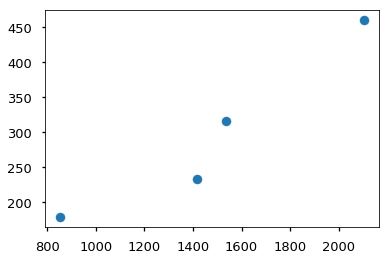

In [4]:
plt.scatter(x, y)
plt.show()

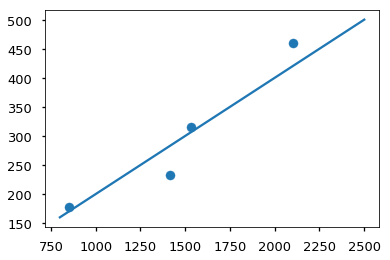

In [18]:
def Hypothesis(theta0, theta1, x):
    return theta0 + theta1*x

theta0 = 0
theta1 = 0.2
x1 = np.linspace(800, 2500, 100)
y1 = Hypothesis(theta0, theta1, x1)
plt.scatter(x, y)
plt.plot(x1, y1)
plt.show()

In [20]:
def CostFunction1(hx, y):
    m = len(y)
    SE = (hx-y)**2
    return 1./(2*m)*SE.sum()

hx = Hypothesis(0, theta1, x)
print hx; print
print CostFunction1(hx, y)

[[420.8]
 [283.2]
 [306.8]
 [170.4]]

535.3849999999998


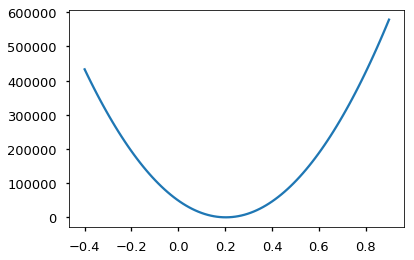

In [28]:
def CostFunction0(hx, y):
    m = len(y)
    SE = (hx-y)**2
    return 1./(2*m)*SE.sum()

def CostFunction1(t1, x, y):
    j = []
    for t in t1:
        hx = Hypothesis(0, t, x)
        cost = CostFunction0(hx, y)
        j.append(cost)
    return j

t1 = np.linspace(-0.4, 0.9, 100)
costj = CostFunction1(t1, x, y)
plt.plot(t1, costj)
plt.show()


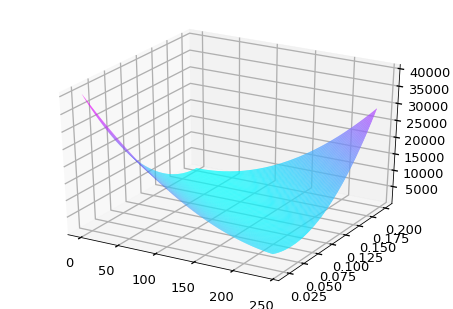

In [132]:
from mpl_toolkits.mplot3d import Axes3D

def CostFunction(t0, t1, x, y):
    hx = Hypothesis(t0, t1, x)
    c = (hx-y)**2
    return 1./(2*len(c))*c.sum()
        
t0 = np.linspace(0, 240, 200)
t1 = np.linspace(0.02, 0.20, 100)

fig = plt.figure()
ax = Axes3D(fig)
X, Y = np.meshgrid(t0, t1)

row = len(X)
col = len(X[0])
Z = []
for i in range(row):
    zz = []
    for j in range(col):
        c = CostFunction(X[i][j], Y[i][j], x, y)
        zz.append(c)
    Z.append(zz)
Z = np.array(Z)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                cmap = plt.cm.cool)
plt.show()


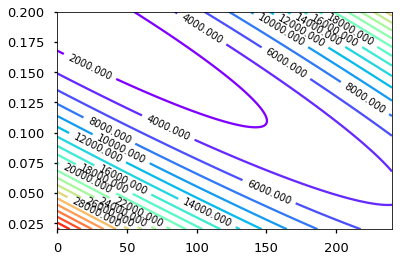

In [129]:
C = plt.contour(X,Y,Z,20, cmap=plt.cm.rainbow)
plt.clabel(C, inline=True,fontsize=10,colors='k') 
plt.show()